# Exercises - UCI Iris Dataset - Classification

Exercises with UCI Iris Dataset.

Original page [https://archive.ics.uci.edu/ml/datasets/iris](https://archive.ics.uci.edu/ml/datasets/iris)

New beta version UCI website [https://archive-beta.ics.uci.edu/ml/datasets/iris](https://archive-beta.ics.uci.edu/ml/datasets/iris)

## Packages import

In [5]:
import requests # web requests
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt # data visualization
import seaborn as sb # data visualization
from sklearn.model_selection import StratifiedShuffleSplit # dataset subsetting 
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import LabelEncoder # mange categorical data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics # results evaluation


# Data preprocessing and exploration

## Data import - (One shoot execution)

Let's use the original website.

Next steps are "one shoot execution", you should execute it only the first time, once did it you can go directly to *Starting points* that youll'find along the code.

First we want to make a web request to download the dataset description and save it locally.

In [5]:
# Dataset description url
description_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names'

requestDatasetDescription = requests.get(description_url, allow_redirects=True)
if requestDescriptionRequest.status_code != 200:
    print(f"Request status: {requestDatasetDescription.status_code}")
else:
    open('Datasets/Iris/Py_IrisDatasetDescription.txt', 'wb').write(requestDatasetDescription.content)


In [6]:
# Read the dataset description
DatasetDescription = open('Datasets/Iris/Py_IrisDatasetDescription.txt', 'r') 

In [7]:
print(DatasetDescription.read())

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

Let's import the dataset directly with *pandas* and save it in a comfortable python format

In [9]:
IrisDF = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

IrisDF.to_pickle("Datasets/Iris/IrisDF.pkl")

## Starting point - read data

Once downloaded the dataset the first time, you can restart from here reading the saved pandas DF object

In [2]:
IrisDF = pd.read_pickle("Datasets/Iris/IrisDF.pkl") 
type(IrisDF)

pandas.core.frame.DataFrame

## Data exploration

In [3]:
print(IrisDF.shape)
IrisDF.head()

(150, 5)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print(IrisDF.describe())

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


Let's add colunmns description

In [4]:
IrisDF.columns = ['Sepal_Length', 'Sepal_Width','Petal_Length', 'Petal_Width', 'Species' ]
print(IrisDF.describe())

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


categorical data exploration

In [7]:
print(IrisDF.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Let's have a graphical global exploration

In [8]:
colors_palette = {'Iris-setosa': '#377eb8', \
                  'Iris-versicolor': '#4eae4b',\
                  'Iris-virginica': '#e41a1c'}

colors = [colors_palette[c] for c in IrisDF.loc[ : , 'Species']]



array([[<AxesSubplot:xlabel='Sepal_Width', ylabel='Sepal_Width'>,
        <AxesSubplot:xlabel='Petal_Length', ylabel='Sepal_Width'>,
        <AxesSubplot:xlabel='Petal_Width', ylabel='Sepal_Width'>],
       [<AxesSubplot:xlabel='Sepal_Width', ylabel='Petal_Length'>,
        <AxesSubplot:xlabel='Petal_Length', ylabel='Petal_Length'>,
        <AxesSubplot:xlabel='Petal_Width', ylabel='Petal_Length'>],
       [<AxesSubplot:xlabel='Sepal_Width', ylabel='Petal_Width'>,
        <AxesSubplot:xlabel='Petal_Length', ylabel='Petal_Width'>,
        <AxesSubplot:xlabel='Petal_Width', ylabel='Petal_Width'>]],
      dtype=object)

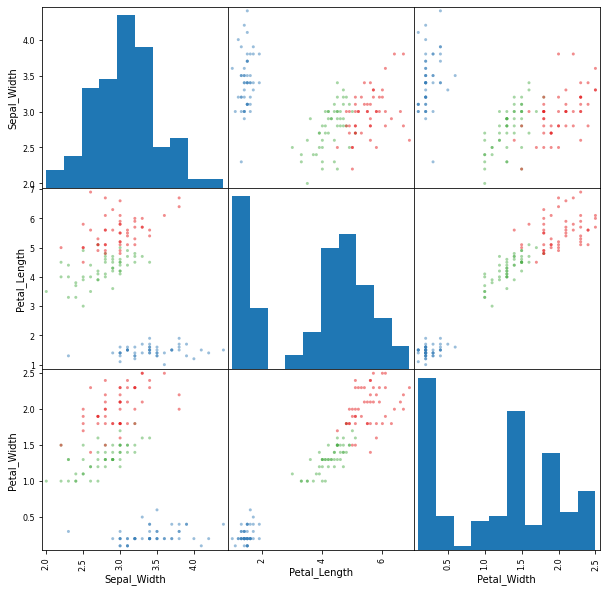

In [9]:
pd.plotting.scatter_matrix(IrisDF.iloc[: , 1: ], color=colors, figsize=(10,10))



Let's try using seaborn

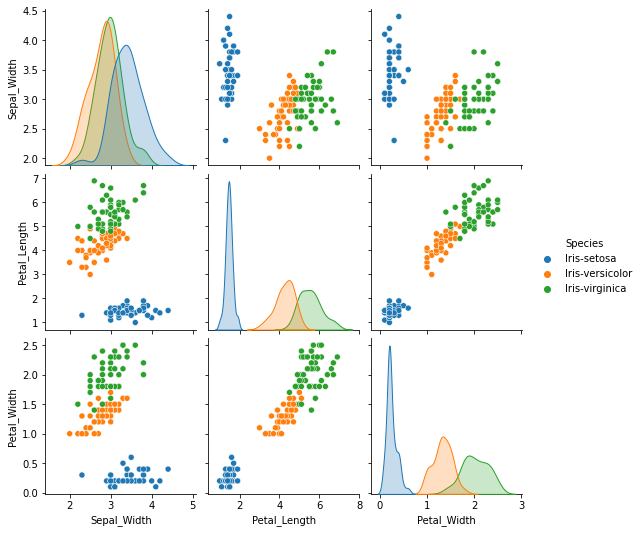

In [10]:
sb.pairplot(IrisDF.iloc[: , 1: ], hue="Species" )


## Training and Test subsetting

Let's create traing and test subset with variable Species propotrional to the original dataset

In [6]:
split_3_7 = StratifiedShuffleSplit(n_splits=1, test_size=0.7, random_state=22)

for train_index, test_index in split_3_7.split(IrisDF, IrisDF['Species']):
    proportional_train = IrisDF.loc[train_index]
    proportional_test = IrisDF.loc[test_index]

In [7]:
proportional_train['Species'].value_counts()/len(proportional_train)

Iris-virginica     0.333333
Iris-versicolor    0.333333
Iris-setosa        0.333333
Name: Species, dtype: float64

In [8]:
proportional_test['Species'].value_counts()/len(proportional_test)

Iris-virginica     0.333333
Iris-setosa        0.333333
Iris-versicolor    0.333333
Name: Species, dtype: float64

In [9]:
proportional_train.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,45.000000,45.000000,45.000000,45.000000
mean,5.877778,2.991111,3.820000,1.182222
std,0.931980,0.456181,1.869565,0.772331
min,4.300000,2.200000,1.000000,0.100000
25%,5.000000,2.700000,1.500000,0.200000
50%,5.800000,3.000000,4.500000,1.300000
75%,6.500000,3.200000,5.100000,1.800000
max,7.700000,4.200000,6.900000,2.500000


In [11]:
proportional_test.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,105.000000,105.000000,105.000000,105.000000
mean,5.828571,3.080952,3.732381,1.205714
std,0.783694,0.422924,1.726017,0.762817
min,4.400000,2.000000,1.200000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.700000,2.500000


# Models application

## Preprocessing - Standardization

A lot of ML models suppose that the data are distributed as a Gaussian with zero mean and unit variance. So we need to standardize the data to achive better results.

*StandardScaler* *Scikit Learn* package makes a simple naive rescaling that could be a good choice in this case. It simply remove the mean and divide for the standard deviation each feature

### Digression on standardization

There are different opinions on when and how apply standardization. We can find 3 main opinions:


- Standardize the entire dataset before splitting
- Standardize the dataset after splitting using the mean ad standard deviation of the training subset also for the test subset
- Standardize the dataset after splitting using the mean ad standard deviation of the training subset only for the training subset and the mean ad standard deviation of the test subset only for the test subset


I've an unpopular opinon: there are no a priori a real good or bad choice, except for some particular situations.

Anyway I have a preference for the third choice.

So let's try to explain the reasons for the third choice wich probably most of the people consider a bad choice.

In most of the cases the statistic behind the model is demostrated supposing tha the data are distributed as a Gaussian with zero mean and unit variance, so make the conditions for this supposition both in the training and in the testing of the model shouldn't be considered a bad idea. We are testing the model in the conditions on wich the teorical bases have been constructed. 

Clearly we must not forget that the "real world dataset" will tend to be a Gaussian with zero mean and unit variance but our dataset will ever bee to small to be exactly that.
Aniway we have no reasons to consider the addition of a non random noise (firsth and second options) a better choice. 

I'm planning to make some empirical test in future to have a feedback on my opinion, for the moment let's apply also the second choice wich is the most common.

In [12]:
scaled_prop_train = proportional_train
scaled_prop_test_T = proportional_test
scaled_prop_test_FT = proportional_test

scaler1 = StandardScaler()
scaler2 = StandardScaler()


scaled_prop_train.iloc[:, 0:4] = scaler1.fit_transform(scaled_prop_train.iloc[:, 0:4])
scaled_prop_test_T.iloc[:, 0:4] = scaler1.transform(scaled_prop_test_T.iloc[:, 0:4])
scaled_prop_test_FT.iloc[:, 0:4] = scaler2.fit_transform(scaled_prop_test_FT.iloc[:, 0:4])


In [13]:
scaled_prop_test_T.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02
mean,3.595008e-17,3.172066e-18,4.229421e-18,-3.595008e-17
std,1.004796e+00,1.004796e+00,1.004796e+00,1.004796e+00
min,-1.831612e+00,-2.568163e+00,-1.474219e+00,-1.456466e+00
25%,-9.341223e-01,-6.674960e-01,-1.241360e+00,-1.193023e+00
50%,-3.663225e-02,-1.923294e-01,3.304380e-01,1.241948e-01
75%,7.326450e-01,7.580039e-01,7.961559e-01,7.828035e-01
max,2.655838e+00,3.133837e+00,1.727592e+00,1.704856e+00


In [14]:
scaled_prop_test_FT.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02
mean,3.595008e-17,3.172066e-18,4.229421e-18,-3.595008e-17
std,1.004796e+00,1.004796e+00,1.004796e+00,1.004796e+00
min,-1.831612e+00,-2.568163e+00,-1.474219e+00,-1.456466e+00
25%,-9.341223e-01,-6.674960e-01,-1.241360e+00,-1.193023e+00
50%,-3.663225e-02,-1.923294e-01,3.304380e-01,1.241948e-01
75%,7.326450e-01,7.580039e-01,7.961559e-01,7.828035e-01
max,2.655838e+00,3.133837e+00,1.727592e+00,1.704856e+00


In [15]:
scaled_prop_train.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,4.500000e+01,4.500000e+01,4.500000e+01,4.500000e+01
mean,-4.798631e-16,1.148772e-16,3.219647e-16,-4.096260e-16
std,1.011300e+00,1.011300e+00,1.011300e+00,1.011300e+00
min,-1.712062e+00,-1.753801e+00,-1.525417e+00,-1.417075e+00
25%,-9.524850e-01,-6.453593e-01,-1.254953e+00,-1.286134e+00
50%,-8.439740e-02,1.970563e-02,3.678310e-01,1.542197e-01
75%,6.751792e-01,4.630823e-01,6.923877e-01,8.089260e-01
max,1.977311e+00,2.679966e+00,1.666058e+00,1.725515e+00


In [16]:
print(scaler1.mean_)
print(scaler1.var_)
print(scaler2.mean_)
print(scaler2.var_)

[5.87777778 2.99111111 3.82       1.18222222]
[0.84928395 0.20347654 3.4176     0.58323951]
[-0.05339427  0.19916761 -0.04739559  0.03076081]
[0.71628167 0.87067037 0.86340151 0.9881846 ]


## Multinomial logistic regression (softmax regression)

Let's use scikit-learn package. 

We need to specify that has to be multinomial classification and we need to specify a solver wich allows softmax regression.

In this case we have few feature and apparently all important so we can reduce the impact of the regularization term. 

In [20]:
# C parameter is the invers of the parameter applied to the regularization term 
softmax_regressionM_Slbfgs_C10 = LogisticRegression(multi_class='multinomial',  solver='lbfgs', C=100)

#encode categorical data
labels = scaled_prop_train.iloc[:,4].to_numpy()
label_encoder = LabelEncoder()
label_encoded_labels = label_encoder.fit_transform(labels)

# training
softmax_regressionM_Slbfgs_C10.fit(scaled_prop_train.iloc[:,0:4], label_encoded_labels)

# prediction
softmax_regressionM_Slbfgs_C10_predictionT = softmax_regressionM_Slbfgs_C10.predict(scaled_prop_test_T.iloc[:,0:4])
softmax_regressionM_Slbfgs_C10_predictionFT = softmax_regressionM_Slbfgs_C10.predict(scaled_prop_test_FT.iloc[:,0:4])

test_labels = scaled_prop_test_T.iloc[:,4].to_numpy()
test_labels_encoded = label_encoder.transform(test_labels)

# results evaluation
print(f"The accuracy of the scikit-learn implementation of Softmax Regression with lbfgs solver and 100 as C parameter on test dataset standardize on traning data is \
{metrics.accuracy_score(softmax_regressionM_Slbfgs_C10_predictionT, test_labels_encoded)}" )
print(f"The accuracy of the scikit-learn implementation of Softmax Regression with lbfgs solver and 100 as C parameter on test dataset standardize on test data is \
{metrics.accuracy_score(softmax_regressionM_Slbfgs_C10_predictionFT, test_labels_encoded)}" )

The accuracy of the scikit-learn implementation of Softmax Regression with lbfgs solver and 100 as C parameter on test dataset standardize on traning data is 0.9809523809523809
The accuracy of the scikit-learn implementation of Softmax Regression with lbfgs solver and 100 as C parameter on test dataset standardize on test data is 0.9809523809523809


Looks good :)